In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
wine_quality = pd.read_csv("winequalityN.csv")
wine_quality.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
# Printing number of distinct values in the 'quality' column
distinct_values_count = wine_quality['quality'].value_counts()
print(distinct_values_count)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


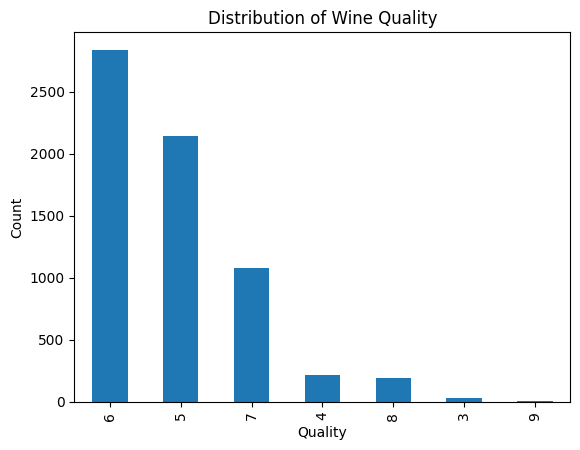

In [4]:
import matplotlib.pyplot as plt

# Plotting the bar chart
distinct_values_count.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

In [5]:
wine_quality.shape

(6497, 13)

In [6]:
wine_quality.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
wine_quality['type'].unique()

array(['white', 'red'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

wine_quality['type_enc'] = enc.fit_transform(wine_quality['type'])

print(wine_quality[['type', 'type_enc']].head())

    type  type_enc
0  white         1
1  white         1
2  white         1
3  white         1
4  white         1


In [9]:
wine_quality.shape

(6497, 14)

In [10]:
wine_quality = wine_quality.drop(['type'], axis = 1)
wine_quality.shape

(6497, 13)

In [11]:
# after label encoding is performed, we get type_enc column
wine_quality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [12]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(wine_quality[['fixed acidity']])
wine_quality['fixed acidity'] = impute.transform(wine_quality[['fixed acidity']])

impute.fit(wine_quality[['volatile acidity']])
wine_quality['volatile acidity'] = impute.transform(wine_quality[['volatile acidity']])

impute.fit(wine_quality[['pH']])
wine_quality['pH'] = impute.transform(wine_quality[['pH']])

In [13]:
print("Shape of dataframe before dropping:", wine_quality.shape)
wine_quality = wine_quality.dropna(axis = 0, subset = ['citric acid','residual sugar','chlorides','sulphates'])
print("Shape after dropping:", wine_quality.shape)

Shape of dataframe before dropping: (6497, 13)
Shape after dropping: (6486, 13)


In [14]:
wine_df = wine_quality.copy()
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [15]:
wine_corr = wine_df.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
fixed acidity,1.000000,0.220887,0.323022,-0.112888,0.298691,-0.283203,-0.330076,0.459238,-0.250596,0.301199,-0.095672,-0.076520,-0.488120
volatile acidity,0.220887,1.000000,-0.377553,-0.196348,0.377082,-0.353044,-0.414455,0.271250,0.259758,0.225240,-0.038853,-0.265852,-0.652712
citric acid,0.323022,-0.377553,1.000000,0.142229,0.039728,0.133640,0.194971,0.096655,-0.327582,0.057987,-0.010368,0.085480,0.186535
residual sugar,-0.112888,-0.196348,0.142229,1.000000,-0.128714,0.403767,0.495665,0.552544,-0.266127,-0.185368,-0.359385,-0.036258,0.348704
chlorides,0.298691,0.377082,0.039728,-0.128714,1.000000,-0.194805,-0.279112,0.362596,0.044295,0.395321,-0.257546,-0.200516,-0.512338
free sulfur dioxide,-0.283203,-0.353044,0.133640,0.403767,-0.194805,1.000000,0.721018,0.026018,-0.145625,-0.189177,-0.179826,0.054369,0.472147
total sulfur dioxide,-0.330076,-0.414455,0.194971,0.495665,-0.279112,0.721018,1.000000,0.032563,-0.237036,-0.275487,-0.265314,-0.042134,0.700212
density,0.459238,0.271250,0.096655,0.552544,0.362596,0.026018,0.032563,1.000000,0.011924,0.259557,-0.687053,-0.305533,-0.390807
pH,-0.250596,0.259758,-0.327582,-0.266127,0.044295,-0.145625,-0.237036,0.011924,1.000000,0.190406,0.120966,0.019122,-0.327908
sulphates,0.301199,0.225240,0.057987,-0.185368,0.395321,-0.189177,-0.275487,0.259557,0.190406,1.000000,-0.003364,0.038142,-0.486681


<Axes: >

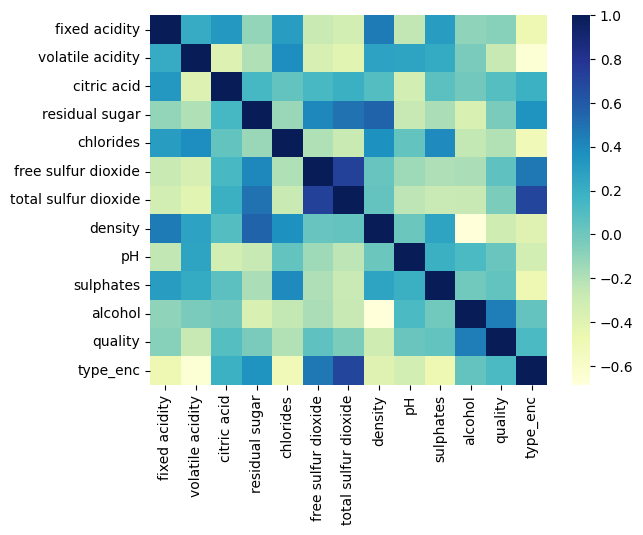

In [16]:
import seaborn as sns
sns.heatmap(wine_corr, cmap = 'YlGnBu')

In [17]:
to_drop = 'total sulfur dioxide'

wine_df = wine_df.drop(to_drop, axis=1)

In [18]:
# after 'total sulfur dioxide' is dropped
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [19]:
wine_df.shape

(6486, 12)

In [20]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(wine_df.values, wine_df['quality'], test_size = .3, random_state=0) # Access the values of the DataFrame using .values
print(X_train1.shape)
print(X_test1.shape)

(4540, 12)
(1946, 12)


In [21]:
# Feature scaling - max value of any column is considered as 1 and min value is considered as 0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train1)

MinMaxScaler()

In [22]:
# transform data
X_train_scaled1 = scaler.transform(X_train1)

In [23]:
print("per-feature minimum before scaling:\n {}".format(X_train1.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train1.max(axis=0)))

per-feature minimum before scaling:
 [3.8     0.08    0.      0.6     0.009   1.      0.98713 2.74    0.22
 8.      3.      0.     ]
per-feature maximum before scaling:
 [ 15.6       1.58      1.66     65.8       0.611   289.        1.03898
   4.01      2.       14.2       9.        1.     ]


In [24]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled1.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled1.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# transform test data
X_test_scaled1 = scaler.transform(X_test1)

Accuracy without scaling

In [26]:
from sklearn.neighbors import KNeighborsClassifier
X_train1, X_test1, y_train1, y_test1 = train_test_split(wine_df.values, wine_df['quality'], test_size = .3, random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train1, y_train1)

print("Test set accuracy: {:.2f}".format(knn.score(X_test1, y_test1)))

Test set accuracy: 0.78


preprocessing using 0-1 scaling and applying KNN

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train1)

X_train_scaled1 = scaler.transform(X_train1)

X_test_scaled1 = scaler.transform(X_test1)

# Applying KNN on scaled data
knn.fit(X_train_scaled1, y_train1)


print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled1, y_test1)))

Scaled test set accuracy: 0.98


Using Standard Scaler and applying KNN

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled_d = scaler.fit_transform(X_train1)

In [29]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train1)

X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled1, y_train1)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled1, y_test1)))

KNN test accuracy: 0.94


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# making predictions
knn_predictions = knn.predict(X_test_scaled1)

# printing classification report
print("Classification Report:\n", classification_report(y_test1, knn_predictions))

# printing confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test1, knn_predictions))

Classification Report:
               precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       0.87      0.57      0.69        60
           5       0.94      0.96      0.95       628
           6       0.95      0.98      0.96       843
           7       0.92      0.94      0.93       346
           8       0.95      0.65      0.77        62
           9       0.00      0.00      0.00         1

    accuracy                           0.94      1946
   macro avg       0.73      0.61      0.65      1946
weighted avg       0.94      0.94      0.94      1946

Confusion Matrix:
 [[  1   4   1   0   0   0   0]
 [  1  34  25   0   0   0   0]
 [  0   1 604  23   0   0   0]
 [  0   0  14 823   6   0   0]
 [  0   0   0  20 325   1   0]
 [  0   0   0   0  22  40   0]
 [  0   0   0   0   0   1   0]]


c:\Users\adnan\Desktop\CSE422_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnan\Desktop\CSE422_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnan\Desktop\CSE422_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Linear Rigression

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
dataset = wine_df.copy()
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [33]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [34]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 0)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(xTrain, yTrain)
yPrediction = clf.predict(xTest)
yPrediction

array([0.795, 0.25 , 0.18 , ..., 0.34 , 0.34 , 0.37 ], shape=(1946,))

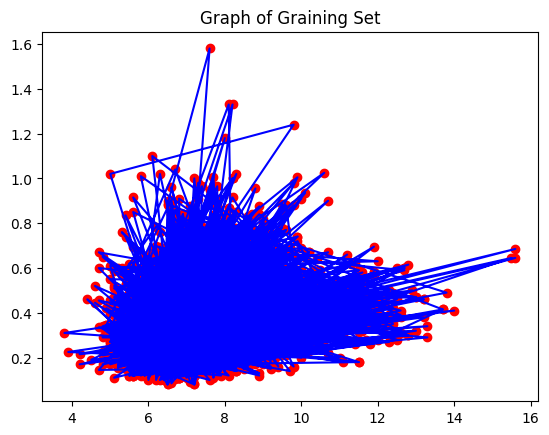

In [35]:
plt.scatter(xTrain[:, 0], yTrain, color = 'red') # Select the first column of xTrain
plt.plot(xTrain[:, 0], clf.predict(xTrain), color = 'blue') # Select the first column of xTrain
plt.title('Graph of Graining Set')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = clf.predict(xTest)
mse = mean_squared_error(yTest, ypred)
r2 = r2_score(yTest, ypred)
print(f'Mean Squared Error: {mse}')
print(f'R_squared value: {r2}')

Mean Squared Error: 6.128581642704462e-30
R_squared value: 1.0


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# converting regression output to binary classification
threshold = 0.5
y_pred_class = (yPrediction > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# printing classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# printing confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1654
           1       0.99      1.00      1.00       292

    accuracy                           1.00      1946
   macro avg       1.00      1.00      1.00      1946
weighted avg       1.00      1.00      1.00      1946

Confusion Matrix:
 [[1652    2]
 [   0  292]]


Logistic Regression

In [38]:
data = wine_df.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [39]:
import pandas as pd
data['wine_quality'] = data['quality'].apply(lambda x: '1' if x<=5 else '0')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1,0


In [40]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
logistic_predictions = model.predict(x_test)
print(logistic_predictions)# printing predictions

['0' '0' '0' ... '1' '1' '1']


c:\Users\adnan\Desktop\CSE422_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print("Logistic Regression accuracy = ", accuracy_score(y_test, logistic_predictions))

Logistic Regression accuracy =  1.0


In [44]:
# Storing accuracy score of logistic regression for later comparison
logistic_predictions_comp = accuracy_score(y_test, logistic_predictions)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R_squared value: {r2}')

Mean Squared Error: 0.0
R_squared value: 1.0


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# printing classification report
print("Classification Report:\n", classification_report(y_test, logistic_predictions))

# printing confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00       694

    accuracy                           1.00      1946
   macro avg       1.00      1.00      1.00      1946
weighted avg       1.00      1.00      1.00      1946

Confusion Matrix:
 [[1252    0]
 [   0  694]]


Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

dataset1 = wine_df.copy()
X = dataset1.drop(columns=['quality'])
y = dataset1['quality']

X = dataset1.iloc[:, :-1]
y = dataset1.iloc[:, -1]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Fitting the model
dt_classifier.fit(X_train, y_train)

# Making predictions
dt_predictions = dt_classifier.predict(X_test)

In [48]:
# Evaluating the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_conf_matrix)

Decision Tree Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       464
           1       0.99      0.99      0.99      1482

    accuracy                           0.98      1946
   macro avg       0.98      0.97      0.97      1946
weighted avg       0.98      0.98      0.98      1946

Confusion Matrix:
 [[ 445   19]
 [  17 1465]]


Gaussian Naive Bayes

In [49]:
dataset2 = wine_df.copy()
X = dataset2.drop(columns=['quality'])
y = dataset2['quality']

X = dataset2.iloc[:, :-1]
y = dataset2.iloc[:, -1]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing the Gaussian Naive Bayes model
gnb = GaussianNB()

# Training the model
gnb.fit(x_train, y_train)

# Making predictions
y_pred = gnb.predict(x_test)

In [52]:
# Evaluating the model
gnb_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy:.2f}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Gaussian Naive Bayes Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           3       0.17      0.17      0.17         6
           4       0.11      0.07      0.08        60
           5       0.51      0.54      0.52       628
           6       0.49      0.43      0.46       843
           7       0.36      0.40      0.38       346
           8       0.16      0.10      0.12        62
           9       0.00      0.00      0.00         1

    accuracy                           0.44      1946
   macro avg       0.26      0.24      0.25      1946
weighted avg       0.45      0.44      0.44      1946

Confusion Matrix:
 [[  1   0   2   2   0   0   1]
 [  2   4  27  21   5   0   1]
 [  3  18 339 218  45   3   2]
 [  0  14 256 363 171   9  30]
 [  0   2  36 120 140  19  29]
 [  0   0   7  20  23   6   6]
 [  0   0   0   1   0   0   0]]


Plotiing prediction accuracy of all models

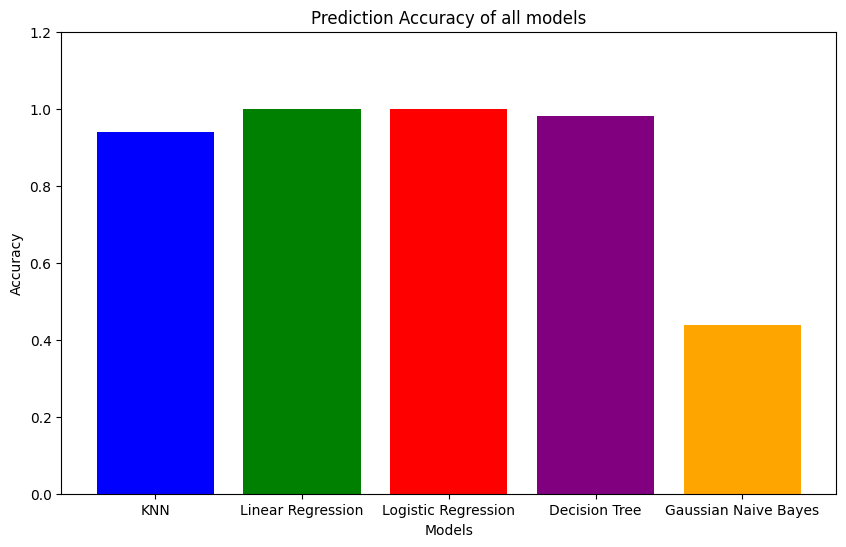

In [53]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['KNN', 'Linear Regression', 'Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes']
accuracies = [
    knn.score(X_test_scaled1, y_test1),  # KNN prediction accuracy
    r2,  # Linear Regression R-squared value
    logistic_predictions_comp,  # Logistic Regression accuracy
    dt_accuracy,  # Decision Tree accuracy
    gnb_accuracy  # Gaussian Naive Bayes accuracy
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of all models')
plt.ylim(0, 1.2)
plt.show()